In [16]:
options(jupyter.plot_scale=1) 

In [17]:
#set parameters
dt = .00001
n = 100000
t = cumsum(rep(dt,n))

In [18]:
#Brownian motion
B = cumsum(rnorm(n,0,sqrt(dt)))

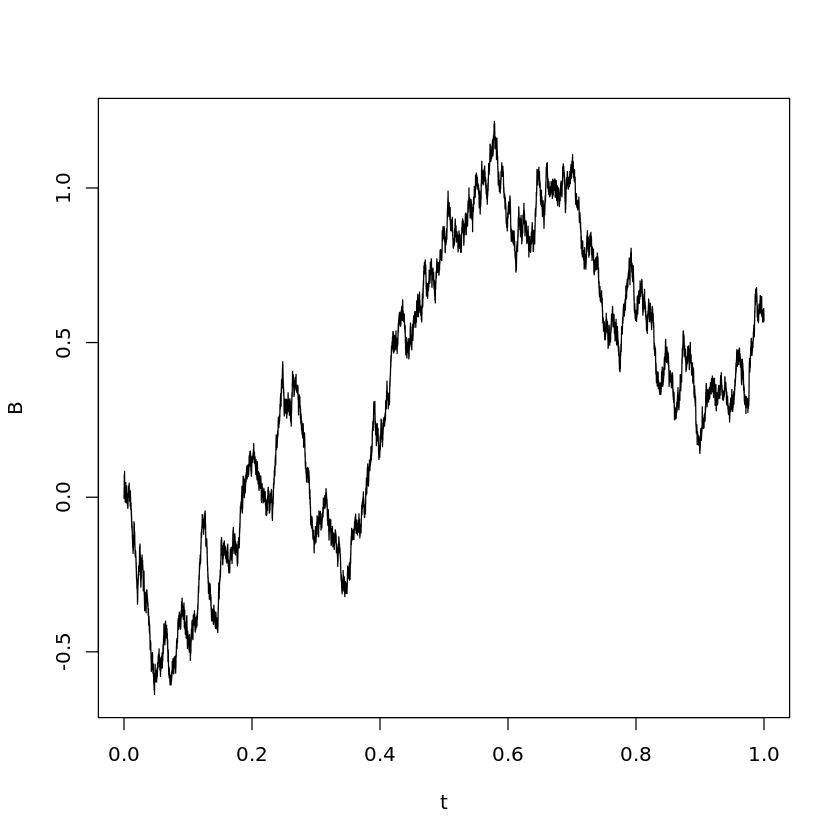

In [19]:
plot(t,B,type="l")

In [21]:
#compute integral two ways
ito_integral = cumsum(B[1:(n-1)]*t[1:(n-1)]*diff(B))
itos_lemma_integral = 1/2*B[1:(n-1)]^2*t[1:(n-1)] - cumsum((1/2*B[1:(n-1)]^2 + t[1:(n-1)]/2)*diff(t))

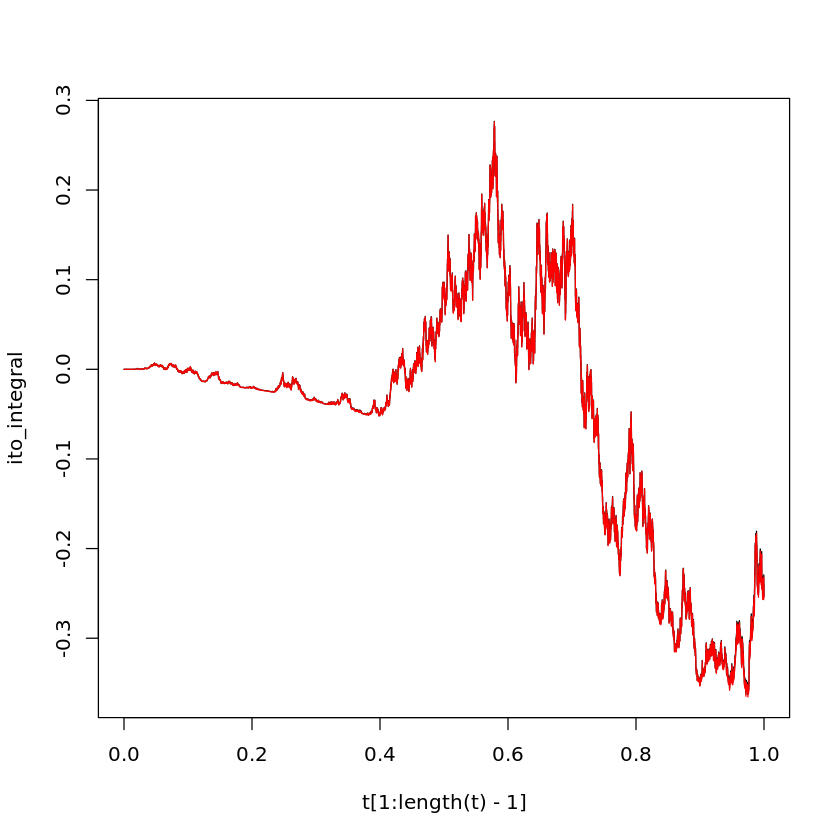

In [22]:
#They look pretty similar
plot(t[1:length(t)-1],ito_integral,type="l")
lines(t[1:length(t)-1],itos_lemma_integral,col="red")

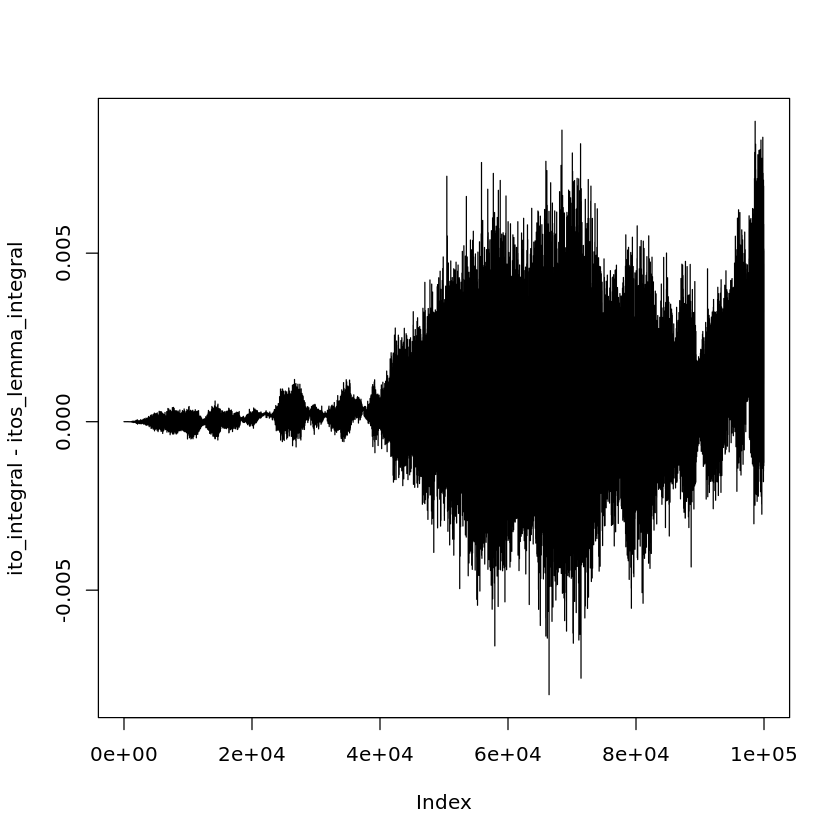

In [23]:
#differences are small and random
plot(ito_integral-itos_lemma_integral,type="l")

In [25]:
#neutral Wright-Fisher
Edx = function(x,t){0}
Vdx = function(x,t){x*(1-x)}
X = numeric(n)
X[1] = .3
for (i in 2:n) {
    X[i] = X[i-1] + Edx(X[i-1],t[i-1])*dt + sqrt(Vdx(X[i-1],t[i-1]))*rnorm(1,0,sqrt(dt))
    X[i] = max(0,X[i])
    X[i] = min(1,X[i])
}

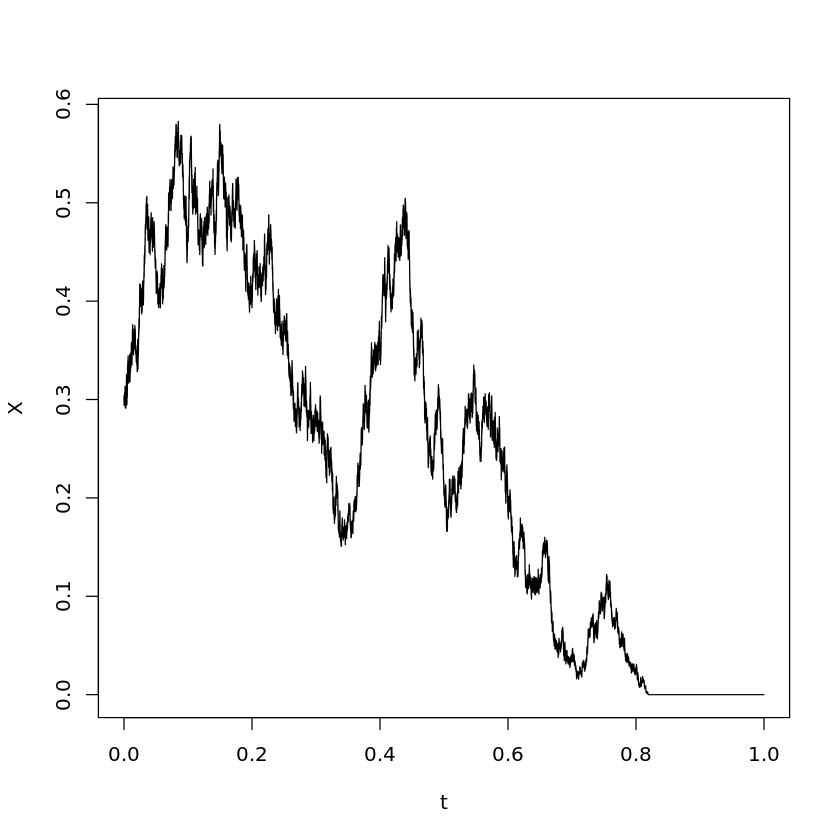

In [26]:
plot(t,X,type="l")

In [27]:
#compute integral two ways
ito_integral = cumsum(X[1:(n-1)]*t[1:(n-1)]*diff(X))
itos_lemma_integral = 1/2*X[1:(n-1)]^2*t[1:(n-1)] - cumsum((1/2*X[1:(n-1)]^2 + Vdx(X[1:(n-1)],t[1:(n-1)])*t[1:(n-1)]/2 ) *diff(t))

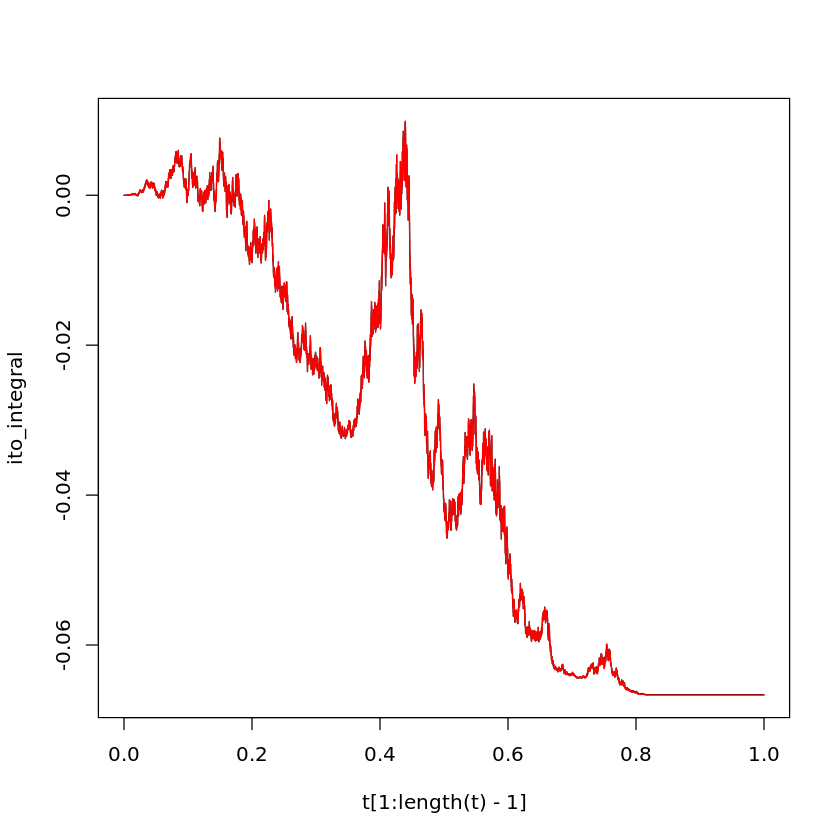

In [28]:
plot(t[1:length(t)-1],ito_integral,type="l")
lines(t[1:length(t)-1],itos_lemma_integral,col="red")

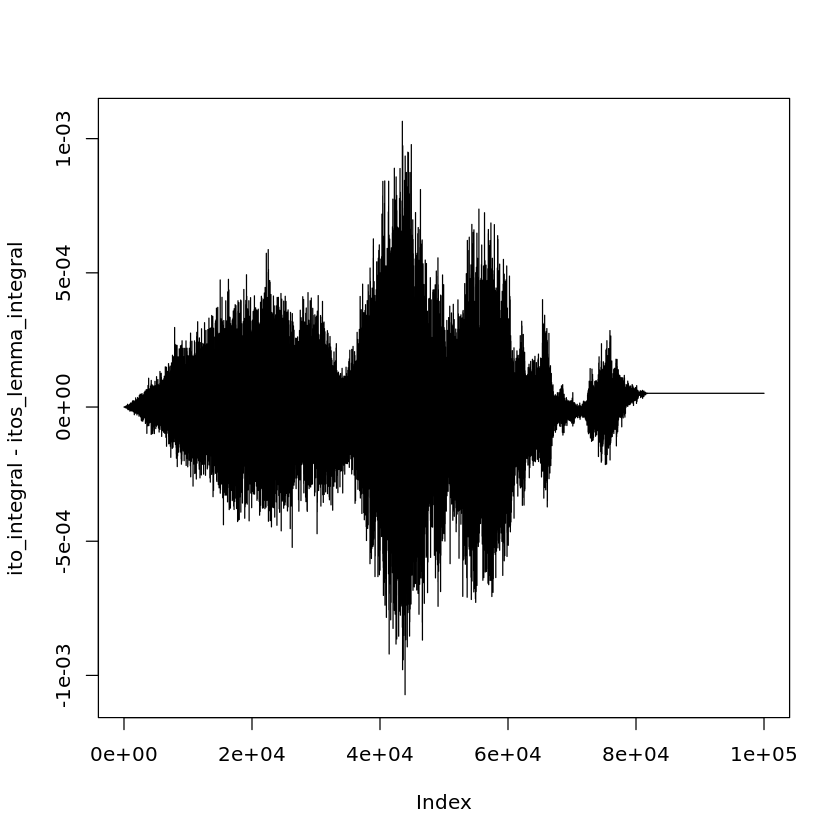

In [30]:
#differences are small and random
plot(ito_integral-itos_lemma_integral,type="l")